<center>

<h1>📚 Maestría en Inteligencia Artificial Aplicada – 3er Semestre</h1>

<h3>Asignatura: Procesamiento de Lenguaje Natural</h3>

<hr style="width:60%;">

<h2>👨‍🎓 Estudiantes</h2>
<ul style="list-style:none; padding:0; font-size:18px;">
    <li>Claudia Martínez</li>
    <li>Sebastián Murillas</li>
    <li>Mario J. Castellanos</li>
    <li>Enrique Manzano</li>
    <li>Octavio Guerra</li>
</ul>

<hr style="width:60%;">

<h3>📅 Fecha: Agosto 15, 2025</h3>

</center>


# Analisis de Sentimientos en reseñas de Hoteles hechas en Trip Advisor

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https:////colab.research.google.com/github/semurillas/NLP_MIAA_252/blob/main/Sesion%201/Practice/7-sentiment-analysis.ipynb)

Para esta práctica, decidimos realizar un análisis de sentimientos a partir de reseñas de hoteles publicadas en TripAdvisor. El objetivo fue clasificar cada reseña en uno de dos posibles valores: negativo (neg) o positivo (pos). Tomando como referencia el ejercicio base compartido por el profesor Luis Ferro, utilizamos el modelo de NLTK con Vader Lexicon para evaluar y comparar el nivel de precisión de las predicciones que genera y entrega frente a las valoraciones reales presentes en el conjunto de datos analizado.

### Referencias
* [Natural Language Processing in Action](https://www.manning.com/books/natural-language-processing-in-action)

In [1]:
import importlib.metadata
import warnings

warnings.filterwarnings('ignore')       # Ignoring any warning

# Use importlib.metadata to get installed packages
installed_packages = [dist.metadata['Name'].lower() for dist in importlib.metadata.Distribution.discover()]
IN_COLAB = 'google-colab' in installed_packages

## Loading all the Libraries required in this Google Colab Notebook

In [2]:
!test '{IN_COLAB}' = 'True' && pip install -r https://raw.githubusercontent.com/semurillas/NLP_MIAA_252/refs/heads/main/requirements_7.txt

## Loading Dataset

Empecemos por cargar el dataset, corresponding to customers giving reviews of Hotels in Trip Advisor. This dataset is available in: https://www.kaggle.com/code/heeraldedhia/airbnb-reviews-sentiment-analysis-and-prediction/notebook.

In [3]:
import pandas as pd
import numpy as np

github_csv_url = 'https://raw.githubusercontent.com/semurillas/NLP_MIAA_252/refs/heads/Practice-1/Sesion%201/datasets/tripadvisor_hotel_reviews.csv'
reviews = pd.read_csv(github_csv_url)

In [4]:
# Let's see if the data was loaded in the dataframe reviews
reviews.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
# Let's see how records were loaded
reviews.shape

(20491, 2)

## Note 1
Were loaded 20.491 records from the file with reviews of Hotels in Trip Advisor

## Checking for Null and Empty Values in the Dataset reviews

In [6]:
# Let's check if there are any null values
reviews.isna().sum()

Review    0
Rating    0
dtype: int64

In [7]:
#Let's check if there are any empty vaules for Review and Rating
if reviews[reviews.Review == ''].index.size > 0 or reviews[reviews.Rating == ''].index.size > 0 :
    print('There are empty values')
    print(reviews[reviews.Review == ''].index)
    print(reviews[reviews.Rating == ''].index)
else:
    print('There are no empty values')

There are no empty values


## Note 2
The **good new** is that our dataset of Reviews of Hotels **has not null or empty values**. So, we can work with this dataset for the purpose of this Practice.

## Checking the quantity of Ratings by Value

Let's see how many records there are in the dataset by Rating


In [8]:
reviews.Rating.value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

## Note 3
There are more records with Rating 5, than Ratings 1 and 2.

This dataset is somewhat unbalanced, as there are significantly more records with a rating of 5 than with ratings of 1 or 2. This imbalance could affect the analysis, as the model might develop a bias toward predicting positive outcomes rather than negative ones.

Additionally, based on the information available on Kaggle for this dataset, it may be advisable to remove ratings of 3 and 4, as they are considered neutral. Our goal is to focus the analysis on two possible sentiment values: Negative (neg) and Positive (pos).

## Removing records with Rating 3 and 4 because are considered Neutral

In [9]:
# Removing the Ratings 3 and 4 because are considered neutral
reviews = reviews[reviews.Rating != 3]
reviews = reviews[reviews.Rating != 4]
reviews.shape

(12268, 2)

To keep things simple, we are going to use VADER to compute the positive or negative score. This model is already implemented in NLTK.

In [10]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mjcastell/nltk_data...


True

## Adding a new Column to dataset with name "Scores"

Let's add a new column to dataset reviews with name "Scores". This column has the Sentiment Intensity Analyzer provided by NLTK with VADER_LEXICON to the Column Review

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews['scores'] = reviews.Review.apply(lambda r: sid.polarity_scores(r))
reviews.head()

,Review,Rating,scores
1,ok nothing special charge diamond member hilto...,2,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com..."
3,"unique, great stay, wonderful time hotel monac...",5,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com..."
4,"great stay great stay, went seahawk game aweso...",5,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co..."
5,love monaco staff husband stayed hotel crazy w...,5,"{'neg': 0.084, 'neu': 0.651, 'pos': 0.265, 'co..."
6,"cozy stay rainy city, husband spent 7 nights m...",5,"{'neg': 0.026, 'neu': 0.609, 'pos': 0.364, 'co..."


## Using the score to generate a prediction label
With these scores, we can now convert the result into a prediction label

In [12]:
reviews['compound'] = reviews.scores.apply(lambda s: s['compound'])
reviews.head(20)

,Review,Rating,scores,compound
1,ok nothing special charge diamond member hilto...,2,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com...",0.9787
3,"unique, great stay, wonderful time hotel monac...",5,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com...",0.9912
4,"great stay great stay, went seahawk game aweso...",5,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co...",0.9797
5,love monaco staff husband stayed hotel crazy w...,5,"{'neg': 0.084, 'neu': 0.651, 'pos': 0.265, 'co...",0.9870
6,"cozy stay rainy city, husband spent 7 nights m...",5,"{'neg': 0.026, 'neu': 0.609, 'pos': 0.364, 'co...",0.9925
8,"hotel stayed hotel monaco cruise, rooms genero...",5,"{'neg': 0.038, 'neu': 0.663, 'pos': 0.298, 'co...",0.9618
9,excellent stayed hotel monaco past w/e delight...,5,"{'neg': 0.064, 'neu': 0.451, 'pos': 0.484, 'co...",0.9756
10,"poor value stayed monaco seattle july, nice ho...",2,"{'neg': 0.08, 'neu': 0.524, 'pos': 0.395, 'com...",0.9666
15,horrible customer service hotel stay february ...,1,"{'neg': 0.132, 'neu': 0.701, 'pos': 0.167, 'co...",0.8496
16,disappointed say anticipating stay hotel monac...,2,"{'neg': 0.096, 'neu': 0.668, 'pos': 0.236, 'co...",0.9905


# Let's add a new column **prediction**.

This column **prediction** is based in the compound. If the compound value is > 0, it will be the prediction = pos and, otherwise will be prediction = neg.

In [13]:
reviews['prediction'] = reviews['compound'].apply(lambda c: 'pos' if c >0 else 'neg')

# Let's check the prediction value added.

In [15]:
reviews.head(15)

,Review,Rating,scores,compound,prediction
1,ok nothing special charge diamond member hilto...,2,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com...",0.9787,pos
3,"unique, great stay, wonderful time hotel monac...",5,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com...",0.9912,pos
4,"great stay great stay, went seahawk game aweso...",5,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co...",0.9797,pos
5,love monaco staff husband stayed hotel crazy w...,5,"{'neg': 0.084, 'neu': 0.651, 'pos': 0.265, 'co...",0.9870,pos
6,"cozy stay rainy city, husband spent 7 nights m...",5,"{'neg': 0.026, 'neu': 0.609, 'pos': 0.364, 'co...",0.9925,pos
8,"hotel stayed hotel monaco cruise, rooms genero...",5,"{'neg': 0.038, 'neu': 0.663, 'pos': 0.298, 'co...",0.9618,pos
9,excellent stayed hotel monaco past w/e delight...,5,"{'neg': 0.064, 'neu': 0.451, 'pos': 0.484, 'co...",0.9756,pos
10,"poor value stayed monaco seattle july, nice ho...",2,"{'neg': 0.08, 'neu': 0.524, 'pos': 0.395, 'com...",0.9666,pos
15,horrible customer service hotel stay february ...,1,"{'neg': 0.132, 'neu': 0.701, 'pos': 0.167, 'co...",0.8496,pos
16,disappointed say anticipating stay hotel monac...,2,"{'neg': 0.096, 'neu': 0.668, 'pos': 0.236, 'co...",0.9905,pos


## Quantity of Positive and Negative Values in Prediction

Let's see how many records in dataframe Reviews, in the column Prediction are Positive (pos) and Negative (neg)

In [16]:
reviews.prediction.value_counts()


prediction
pos    10876
neg     1392
Name: count, dtype: int64

## Analyzing Metrics

Let's get the metrics to compare the predictions obtained with NTLK and VADER_LEXICON vs Rating converted into a new column *+sentiment_label** with positive (pos) and negative (neg) as values based in the values in Rating. 5 is positive (pos), and 1 and 2 are negative (neg)  

In [17]:
# Map the 'Rating' values to 'neg' and 'pos'
reviews['sentiment_label'] = reviews['Rating'].apply(lambda rating: 'neg' if rating <= 2 else 'pos')

# Display the first few rows to show the new column
display(reviews.head())

,Review,Rating,scores,compound,prediction,sentiment_label
1,ok nothing special charge diamond member hilto...,2,"{'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com...",0.9787,pos,neg
3,"unique, great stay, wonderful time hotel monac...",5,"{'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com...",0.9912,pos,pos
4,"great stay great stay, went seahawk game aweso...",5,"{'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co...",0.9797,pos,pos
5,love monaco staff husband stayed hotel crazy w...,5,"{'neg': 0.084, 'neu': 0.651, 'pos': 0.265, 'co...",0.9870,pos,pos
6,"cozy stay rainy city, husband spent 7 nights m...",5,"{'neg': 0.026, 'neu': 0.609, 'pos': 0.364, 'co...",0.9925,pos,pos


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assigning the real sentiment based in the Rating given.
y_true = reviews.sentiment_label.values

## Assigning the prediction done by NTLTK with VADER_LEXICON
y_pred = reviews.prediction.values


# Getting the metrics: Accuracy (acc), Confussion Matrix (cm) and Classification Report (cr)
acc = accuracy_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
cr = classification_report(y_true, y_pred)

#Printing the result of the metrics
print(f"Accuracy:\n{acc}\n")
print(f"Classification Report:\n{cr}")
print(f"Confusion Matrix:\n{cm}")

Accuracy:
0.843495272253016

Classification Report:
              precision    recall  f1-score   support

         neg       0.96      0.42      0.58      3214
         pos       0.83      0.99      0.90      9054

    accuracy                           0.84     12268
   macro avg       0.90      0.71      0.74     12268
weighted avg       0.86      0.84      0.82     12268

Confusion Matrix:
[[1343 1871]
 [  49 9005]]


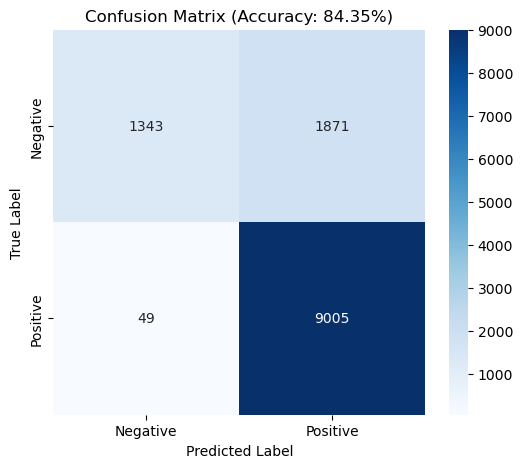

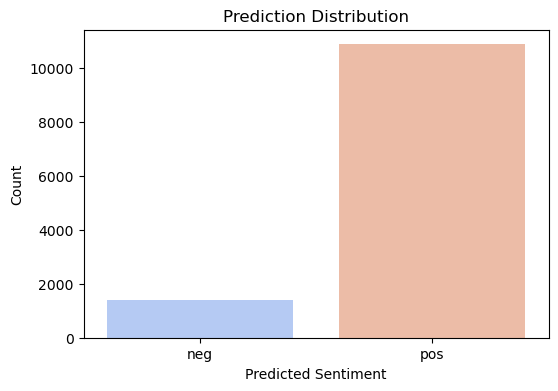

Classification Report:

              precision    recall  f1-score   support

         neg       0.96      0.42      0.58      3214
         pos       0.83      0.99      0.90      9054

    accuracy                           0.84     12268
   macro avg       0.90      0.71      0.74     12268
weighted avg       0.86      0.84      0.82     12268



In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Actual sentiment labels
y_true = reviews["sentiment_label"].values

# Predicted sentiment labels
y_pred = reviews["prediction"].values

# Metrics
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred, output_dict=True)

# ---- 1. Confusion Matrix Heatmap ----
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2%})")
plt.show()

# ---- 2. Class Distribution Bar Chart ----
plt.figure(figsize=(6, 4))
sns.countplot(x=y_pred, order=["neg", "pos"], palette="coolwarm")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Count")
plt.title("Prediction Distribution")
plt.show()

# ---- 3. Print the classification report ----
print("Classification Report:\n")
print(classification_report(y_true, y_pred))


<h1>CONCLUSIONS</h1>


## 📊 Confusion Matrix (Color-Coded)

|               | **Predicted Negative** | **Predicted Positive** |
|---------------|------------------------|------------------------|
| **Actual Negative** | <span style="color:green">**1343 (TN)**</span> ✅<br><small>Correctly predicted as negative.</small> | <span style="color:red">**1871 (FP)**</span> ❌<br><small>Predicted positive when actually negative (Type I error).</small> |
| **Actual Positive** | <span style="color:red">**49 (FN)**</span> ❌<br><small>Predicted negative when actually positive (Type II error).</small> | <span style="color:green">**9005 (TP)**</span> ✅<br><small>Correctly predicted as positive.</small> |

---

## 📈 Accuracy
**0.8435** (≈ **84.35%**)

> The model correctly predicts sentiment for about **84%** of reviews.  
> However, because the dataset is **imbalanced** (many more positives than negatives), this single number can be **misleading**—it masks weaker performance on the negative class.

---

## 📐 Precision, Recall, and F1-Score

| Metric   | Negative (`neg`) | Positive (`pos`) |
|----------|------------------|------------------|
| **Precision** | <span style="color:green">**0.96**</span> ✅ | **0.83** |
| **Recall**    | <span style="color:red">**0.42**</span> ❌ | <span style="color:green">**0.99**</span> ✅ |
| **F1-score**  | **0.58** | <span style="color:green">**0.90**</span> ✅ |

**What they mean:**
- **Precision**: When the model predicts a class, how often is it correct?
  - `neg`: 96% (very reliable when it flags “negative”).
  - `pos`: 83%.
- **Recall**: Of the actual instances of a class, how many did the model find?
  - `neg`: 42% (low—misses many truly negative reviews).
  - `pos`: 99% (excellent—finds almost all positives).
- **F1-score**: Balance of precision and recall.
  - `neg`: 0.58 (driven down by low recall).
  - `pos`: 0.90 (strong overall).

---

## 🧭 Key Insights
1. **Strengths**
   - Outstanding at detecting **positive** reviews (high recall **and** high F1 for `pos`).
   - When it predicts **negative**, it is **usually right** (precision = **0.96**).

2. **Weaknesses**
   - Struggles to **find** all negative reviews (recall for `neg` = **0.42**), leading to many **false positives** (negatives mislabeled as positive).

3. **Why Accuracy Isn’t Enough**
   - With an **imbalanced dataset**, high accuracy can be achieved by favoring the majority class (positives), while **underperforming** on the minority class (negatives).

4. **Practical Takeaway**
   - If catching **dissatisfied** customers matters, prioritize improving **recall for `neg`** (e.g., class weighting, threshold tuning, resampling, or in this case a different classifier).

